In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

<h1> Logistic Regression </h1>

In [2]:
1.
2.

2.0

In [ ]:
bla bla 

In statistic , the logistic model is used to model the probabilitu of a cetain or event existing such as pass/fail, alive/dead or healthy/sick.This can be extended to model several classes of events such as determing whether an image contains a cat,dog, lion, etc.

<h2> Odds Ratio (OR)</h2>

The odds ratio is the probability to occur some event $A$ divided to the probability of not occur.
$$1) \; \; \; odds(P) = \frac{P(A)}{1-P(A)} $$ 
where $P(A)\in [0,1]$ Let's see the graphic of the function
     

<ipython-input-9-582ba8b57d2c>:2: RuntimeWarning: divide by zero encountered in true_divide
  odds = p/(1-p)


Text(0, 0.5, 'P(A)')

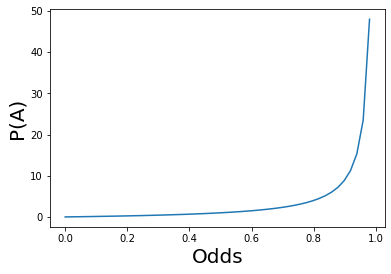

In [9]:
p = np.linspace(0,1)
odds = p/(1-p)
plt.plot(p,odds)
plt.xlabel("Odds(P)",size='20')
plt.ylabel("P(A)",size='20')


Important points about Odds ration : 
<ul>
      <li> The function is not symetric  </li>
    <li> $OR > 1$ indicates increased occurence of event $OR\in [0:1)$ </li>
    <li> $OR < 1$ indicates decreased occurence of event and $OR\in (1:\infty]$ </li>
 </ul>  
We can transform the function into another one that is more appropriate for interpretation, without losing the underlying information.The new function is called Log Odds or Logit function.
 

<h2>Logit function </h2>

Probability, odds ratios and log odds are all the same thing, just expressed in different ways. 
$$LogOdds  = \log(Odds)=\log{ \frac{P(A}{1- P(A)} }   $$

<ipython-input-17-78155be9e329>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(p,np.log(odds))


Text(0, 0.5, 'log Odds')

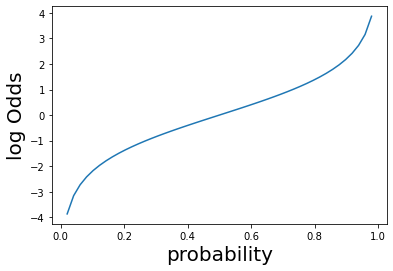

In [17]:
plt.plot(p,np.log(odds))
plt.xlabel("probability",size='20')
plt.ylabel("log Odds",size='20')


The benefits are : 
<ul> 
    <li> The logit function unlike Odds is symetric </li>
    <li> The loggit varies between $[-\infty:\infty]$ </li>
</ul>
The above properties able the Logit to be linked or described by polynomial functions including linear one.The logit function is the root of Logistic regression.

<h2> Sigmoid function </h2>

The main point of logistic regression take up of assumtion : </br> </br>
<br>
$$ 3) \; \; log(\frac{p}{1-p})^i = \vartheta_0 + \vartheta_1 x^i_{1} + \vartheta_2 x_{2}^i+ ...\vartheta_p x_{p}^i  $$  <br>
where , $i$ is number of obeservation,

$x_p $ feature values,
$\vartheta_0$ intercept,
$\vartheta_{p}$ (weight) slope coeff. for each explanority var.

If we raise up on $e$ the both sides of $3)$ : <br> <br>
$e^{log(\frac{p}{1-p})} = e^{h(x{^i)}} \; $ where $h(x{^i})=\vartheta_0 + \vartheta_1 x^i_{1} + \vartheta_2 x_{2}^i+ ...\vartheta_p x_{p}^i $
<br> <br>
$ 	\Rightarrow  \frac{p}{1-p} = e^{h(x^i)} $
<br> <br>
$ 	\Rightarrow  p = e^{h(x^i)}(1-p) \;  $
<br> <br>
$\Rightarrow  p = e^{h(x^i)}-p.e^{h(x^i)}  \;  $
<br> <br>
$\Rightarrow p(1+e^{h(x^i}  ) = e^{h(x^i)}  \; $
<br> <br>
$\Rightarrow p= \frac {e^{h(x^i)}} {1 +e^{h(x^i)}}  $
<br> <br>
$\Rightarrow p= \frac {e^{h(x^i)}e^{-h(x^i)}} {(1 +e^{h(x^i)})e^{-h(x^i)}}  $
<br> <br>
$\Rightarrow p= \frac{1}{1 +e^{-h(x^i)}  }   $

The function $$\sigma = p=   \frac{1}{1 +e^{-h(x^i)}  }$$
is called sigmoid

The sigmoid function has verry intersting proporties.
Let see for example :  $p= \frac{1}{1 +e^{2.x + 4}  }$

In [19]:
def sigmoid(x,a,b):
    z = [i*a +b for i in x]
    result = [1/(1+np.exp(-i)) for i in z ]
    return result

In [22]:
x = np.linspace(-10,10,30)
y =  sigmoid(x,2,4)

Text(0, 0.5, 'Sigmoid')

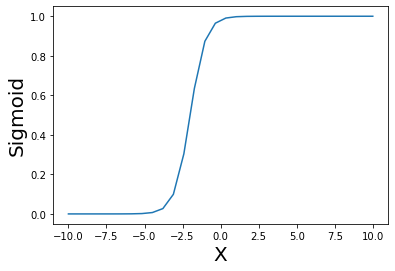

In [24]:
plt.plot(x,y)
plt.xlabel("X",size='20')
plt.ylabel("Sigmoid",size='20')

<h2>Properties and Identities Of Sigmoid Function </h2>

The graph of sigmoid function is an S-shaped curve as above line in the graph.The main proporties : 
<ul>
    <li> It is difined in domain  $x\in[-\infty:\infty]$ </li>
    <li>The function is differentiable everywhere in its domain.</li>
    <li> The range of $\sigma$ =  $x\in(0:1)$ </li>
    <li> $\sigma(0)= 0.5 $ </li>
     <li>  The function is monotonically increasing. </li>
    <li>  The function is continuous everywhere. </li>
    <li> Numerically, it is enough to compute this function’s value over a small range of numbers, e.g., [-10, +10]. For values less than -10, the function’s value is almost zero. For values greater than 10, the function’s values are almost one.</li>

Let see the sigmoid with diferent weights $\vartheta_{0}$ and $ \vartheta_{1} $

In [42]:
def cartesian(start,end,step):
    x = y = np.linspace(start,end,step)
    result = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
            
    return result  
def plot(num):
    """
    
    """
    
    size = np.sqrt(num)  
    a = cartesian(1,100,num)
  
    x = np.linspace(-10,10,30)
    if not size.is_integer():
        raise ValueError("num must has precise  root of integer type ")
    size = int(size)
    fig, axs = plt.subplots(size, size,figsize=(25,25))    
    for i in range(size):
        for j in range(size):
            axs[i, j].set_title(r'$ \theta_0 = {},\theta_1 = {} $'.format(i,j),size=20) 
            y=sigmoid(x,i,j)
            axs[i, j].plot(x,y)

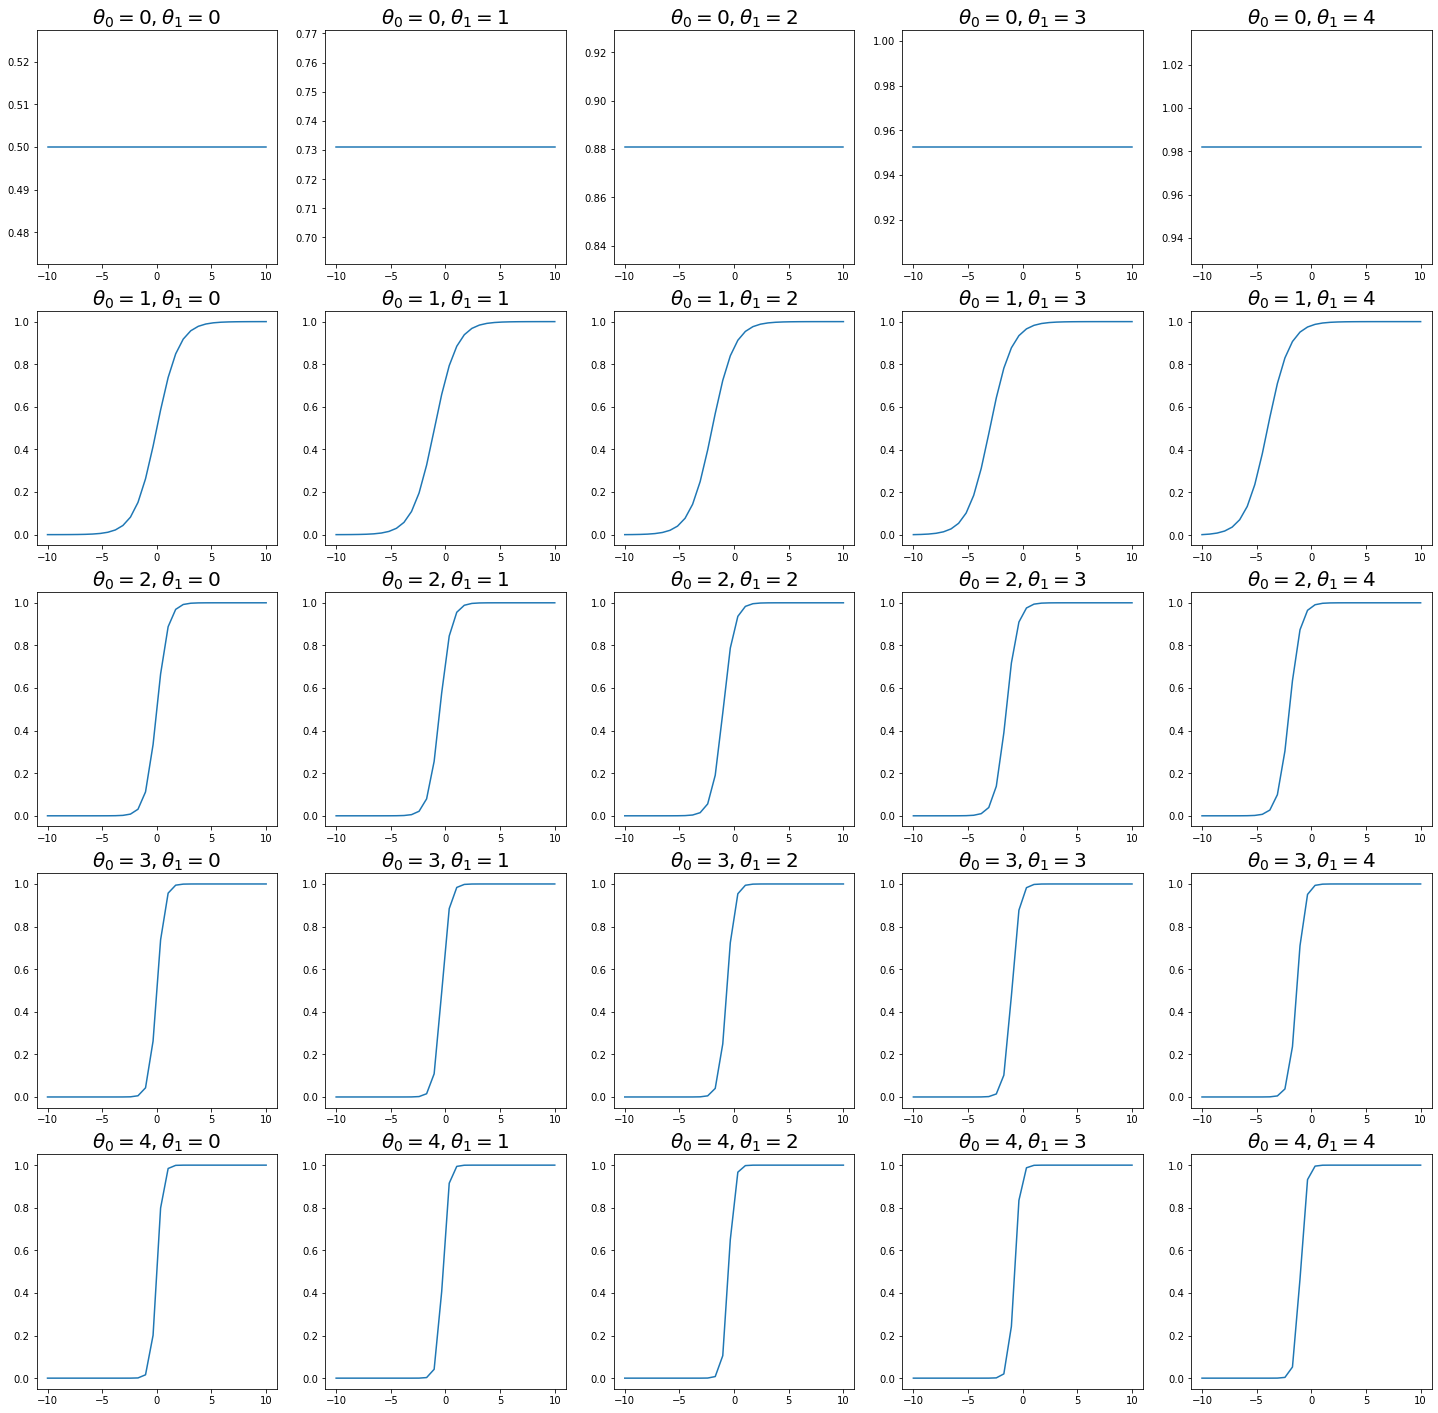

In [44]:
plot(25)

<h2>Binary Logistic Regression</h2>

Let's generate our data.

In [45]:
# generate labeled  from already define y data given the sigmoid with args z = 5*x-4 
# with some random getting of data between [0.3,0,7]
def generated_label(i):
        if i < 0.3 :
            return 0
        elif i > 0.7 :
            return 1
        else :
            return np.random.randint(0,2)

In [46]:
y_label = np.array([generated_label(i) for i in y])    

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y_label, test_size=0.33, random_state=42)

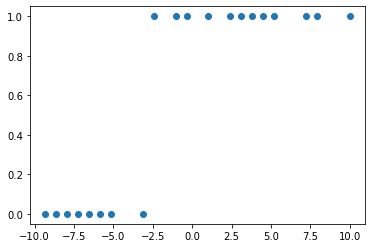

In [50]:
plt.scatter(X_train,y_train)

Out pupose is to find the sigmoid that the best fit the above points

We've saw that  the sigmoid transforms every variable belongs  $𝑥∈[−∞,∞]$  into variable belongs to interval  $\sigma∈[0,1]$,we will consider every  $\sigma \in (0,0.5)$ as $0$ and  $\sigma > 0.5 $ as $1$ 

The logistic regression deals with finding the best parameters $\theta s = \theta_0,\theta_1,..,\theta_p $ according to given data using some appropriative Loss function.In contex of above data we have to find the best $\theta_0,\theta_1$.Unlike Linear regression the least-squared can not to be applied,we have to use another more appropriateve loss function for optimization.The loss function of logistic regression is doing this exactly which is called Logistic Loss. 

<h3> Logistic Loss or Cross-entropy loss </h3>

LogLoss funtion for sigmoid is difined : 
$$ 5) \; \;  LogLoss(\sigma_{\Theta}(x),y) = \Bigg( \begin{matrix}  -log(h_{\Theta}(x)) && if\; y=1 \\log( 1 - h_{\Theta}(x)) && if\; y=0\end{matrix}\Bigg)  $$ 

In [54]:
def error_0(x):
       return  -np.log(1-x)
    
def error_1(x):
      return -np.log(x)

<ipython-input-54-b62c9a74d392>:2: RuntimeWarning: divide by zero encountered in log
  return  -np.log(1-x)
No handles with labels found to put in legend.


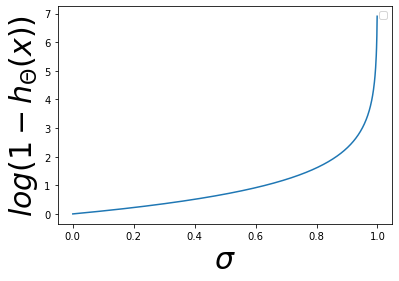

<ipython-input-54-b62c9a74d392>:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(x)
No handles with labels found to put in legend.


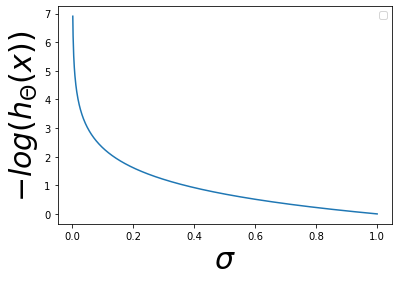

In [60]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values))
plt.xlabel(r'$\sigma$',size=30)
plt.ylabel(r'$log(1 - h_{\Theta}(x))$',size=30)
plt.legend()
plt.show()
plt.plot(sigmoid_values, error_1(sigmoid_values))
plt.ylabel(r'$-log(h_{\Theta}(x))$',size=30)
plt.xlabel(r'$\sigma$',size=30)
plt.legend()
plt.show()

The LoggLoss function also called Cross-entropy loss.measures the performance of a classification model whose output is a probability value between 0 and 1.Cross-entropy loss increases as the predicted probability diverge from the actual label.So predicting a probability of 0.01 when the actual observation label is 1 would be bad and result  in a high loss value showing in graph 2 above for $\log( 1 - h_{\Theta}(x))$.A perfect model would have a log loss of 0.As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predictions that are confident and wrong!
Cross-entropy and log loss are slightly different depending on context, but in machine learning when calculating error rates between 0 and 1 they resolve to the same thing.


<ipython-input-54-b62c9a74d392>:2: RuntimeWarning: divide by zero encountered in log
  return  -np.log(1-x)
<ipython-input-54-b62c9a74d392>:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(x)


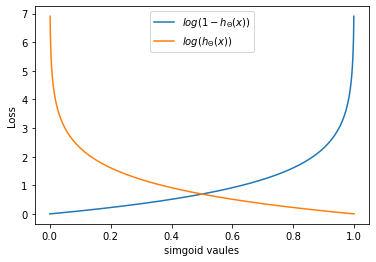

In [61]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values), label = r'$log(1 - h_{\Theta}(x))$')
plt.xlabel('simgoid vaules')
plt.ylabel('cost')
plt.legend()
plt.plot(sigmoid_values, error_1(sigmoid_values), label = r'$log(h_{\Theta}(x))$')
plt.xlabel('simgoid vaules')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h3>  Log-Likelihood  </h3>
The eq 2) can be rewrite in more compact form.In probability theory cross-entropy is know as  Log-Likelihood 
    Let us regard  the value of $h_{\Theta}(x)$ as probability: <br>
        $$ \begin{matrix}
P(y=1|x,\Theta) = h_{\Theta}(x)  \\
P(y=1|x,\Theta) = 1-h_{\Theta}(x)
\end{matrix}\;\; =\; P(y|x;\Theta)=h_{\Theta}^y(1-h_{\Theta}(x))^{1-y}$$ 
<br>
So the likehood is: <br> <br>
    $L(\Theta) = p(y|X;\Theta) = $ <br> <br>
    $= \prod_{i=1}^{m}p(y^{(i)}|x^{(i)};\Theta) $ <br> <br>
    $= \prod_{i=1}^{m}h_{\Theta}(x^{(i)})^{y^{i}}(1-h_{\Theta}(x))^{1-y^{(i)}}$   <br> <br> 
And the log likehood:
      $$ 6) logLoss(L(\Theta))=\sum_i^my_i.log(h_{\Theta}(x_i)) + (y_i-1)log(1 - h_{\Theta}(x_i))$$
   The above euation is called likelihood or cross entropy.<br>
   This is will be our lost function 
 $$ (7) \; \;J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (y_i-1)log(1 - h_{\Theta}(x_i))\big)$$

<h2 > Optimization of LossLogg </h2>

Let's 

<ipython-input-63-de5ae9805159>:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
<ipython-input-63-de5ae9805159>:3: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(x)


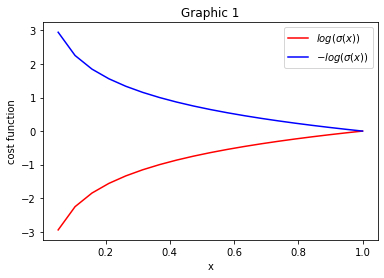

<ipython-input-63-de5ae9805159>:13: RuntimeWarning: divide by zero encountered in log
  y = np.log(1-x)
<ipython-input-63-de5ae9805159>:14: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(1-x)


Text(0.5, 1.0, 'Graphic 2')

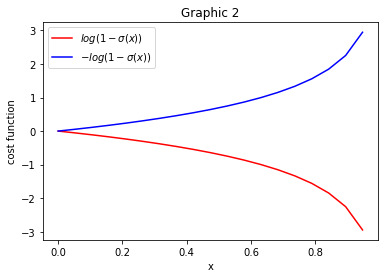

In [63]:
x = np.linspace(0,1,20)
y = np.log(x)
y1 = -np.log(x) 

plt.plot(x,y,color='red',label=r'$log(\sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(\sigma(x))$')
plt.xlabel("x")
plt.ylabel("cost function")
plt.title('Graphic 1')
plt.legend()
plt.show()

y = np.log(1-x)
y1 = -np.log(1-x) 

plt.plot(x,y,color='red',label=r'$log(1- \sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(1- \sigma(x))$')
plt.xlabel("x")
plt.ylabel("cost function")
plt.legend()
plt.title('Graphic 2')

 $$ (3) \; \; \; x \to 1 \; then \; -log(\sigma(x)) \to 0 $$ 
  $$ (4) \; \; \; x \to 1 \; then \; -log(\sigma(x)) \to 0 \;    $$
  <br> <br>
   $$(5) \; \; \;x \to 0 \; then \; log(\sigma(x)) \to \infty $$
  $$ (6) \; \; \;x \to 0 \; then \;  -log(\sigma(x)) \to -\infty $$ </br>
</h5>  
<h7>
    <font color='#255e5c'>
From eq. (3) we could conclude that when we have to fit the estimators($\theta_i$) values to label(target) ones which take value either 1 or 0 then eq. $-log(\sigma(x))$must minimize.<br> 
        In such a way, the min error(min loss) which refer to min-entropy will be achieved in case when the target value is equal to 1. <br>
        if we use eq.(4) we have to  maximize a $log(\sigma(x))$ this will give the min-entropy and min error as well but $log(\sigma(x))$ has not a closed-form, therefore the finding the extremums is a difficult task.When the target value is 0 the both functions $log(1−σ(x)),−log(1−σ(x))$ are useless, because they tend to infinity  $−log(1−σ(x)),−log(1−σ(x))→+−∞$ and  $error→+−∞$  and entropy do the same , since they also have a closed-form

$$ (7) \; \; \; x \to 1 \; then \; -log(1-\sigma(x)) \to -\infty $$ 
  $$ (8) \; \; \; x \to 1 \; then \; -log(1-\sigma(x)) \to \infty;    $$ <br> <br><br>
    $$(9) \; \; \;x \to 0 \; then \; \;log(1-\sigma(x)) \to 0 $$
  $$ (10) \; \; \;x \to 0 \; then \; \; -log(1-\sigma(x)) \to 0 $$ </br>
</h5>  
 <h7>
  <font color='#255e5c'>
The above thoughts can be taken into account for eq. (7)(8)(9)(10) as well, but with the opposite logic, when the target value is equal to 0 then  the best choice is $-log(1-\sigma(x))$ because it has closed-form tends to 0 not to infinity. <br> <br>
   
   We've assumed that why the minimization of eq (2) will give the min error equivalented to min-entropy.

   Let's dive into mathematics behind minimization of cross-entropy.<br><br>
We will use the well known Gradient denscent for minimization in order to find:
<br> <br>
$$\frac{\partial J(\Theta)}{\partial x_i}$$
 <br> <br>
   where 
          $$ J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (1-y_i)log(1 - h_{\Theta}(x_i))\big)$$

$(1)\; \frac{\partial h_{\Theta(z)}}{\partial x_i } = \frac{d h_{\Theta(z)}}{dz}.\frac{\partial z}{\partial x_i}  $
  <br> <br>
  $(2)\; \frac{d h_{\Theta(z)}}{dz} = \frac{\frac{1}{1+e^{-z}}}{dz}$
  
  $\;= \frac{e^{-z}}{(1+e^{-z})^2}$
   <br>
  
   
  $\;=\frac{1}{1+e^{-z}}(1 -\frac{1}{1+e^{-z}} ) $ 
  <br> <br>
  $\;= h_{\Theta}(z)(1 - h_{\Theta}(z))  $
  
  <br> <br>
  
  $ (3) \; \frac{d(log(h_{\Theta}(x_i)))}{dz} = \frac{1}{h_{\Theta}(z)}\frac{dh_{\Theta}(z))}{dz}$ <br>
 <br> <br>
 $by\; plugin \;the\; eq.\;(2)\;$ <br> <br>
$\;=\frac{1}{h_{\Theta}(z)} h_{\Theta}(z)(1 - h_{\Theta}(z))$ <br>


 <br> <br>

$\;=( 1 - h_{\Theta}(z) ) $
<br> <br> <br> <br>
$ (4)\; \frac{dlog(1 - h_{\Theta}(z))}{dz} = \frac{1}{(1- h_{\Theta}(z))}\frac{d(1-h_{\Theta}(z)))}{dz}$
<br> <bR>

$ \; = \frac{1}{(1- h_{\Theta}(z))}\frac{-d(h_{\Theta}(z)))}{dz}$
 <br> <br>
 $by\; plugin \;the\; eq.\;(3)\;$ <br> <br>
$\;=-\frac{1}{(1-h_{\Theta}(z))} h_{\Theta}(z)(1 - h_{\Theta}(z)) $ <br> <br>
$\; =- h_{\Theta}(z)) $ 
    





Let to find partial derivate of function  $J(\Theta)$ respect to $x_i$ <br> <br> <br>
$(5) \; \; \dot{J}(\theta)_{\theta_i}=\frac{\partial J(\theta)}{\partial \theta_i} =   -\frac{1}{m}\sum_i^m\big(y_i \frac{\partial log(h_{\Theta}(z))}{\partial \theta_i}+  (1-y_i) \frac{\partial log(h_{\Theta}(z)-1)}{\partial \theta_i}\big) = $ <br> <br>
$-\frac{1}{m}\sum_i^m\big(y_i \frac{dlog(h_{\Theta}(z))}{dz}\frac{\partial z}{\partial \theta_i}+  (y_i-1) \frac{dlog(1- h_{\Theta}(z))}{dz}\frac{\partial z}{\partial \theta_i}\big)   $

appying  equations (3) (4) to (5)  we will achieve <br>
$(6)\;\dot{J}(\theta)_{.\theta_i}=-\frac{1}{m}\sum_i^m\big(y_i (1 - h_{\Theta}(z))\frac{\partial z}{\partial .\theta_i}+  (1-y_i) (- h_{\Theta}(z))\frac{\partial z}{\partial x_i})\big) $
    <br> <br>
$\;\;\;\;\;\;\;\;\;\;=-\frac{1}{m}\sum_i^m\big(y_i\frac{\partial z}{\partial x_i} -y_ih_{\Theta}(z))\frac{\partial z}{\partial \theta_i} +y_ih_{\Theta}(z))\frac{\partial z}{\partial \theta_i} - h_{\Theta}(z)\frac{\partial z}{\partial \theta_i})  $
<br> <br>
$\;\;\;\;\;\;\;\;\;\;= -\frac{1}{m}\sum_i^m \big(y_i \frac{\partial z}{\partial \theta_i} - h_{\Theta}(z)\frac{\partial z}{\partial \theta_i}\big) $
<br> <br>
$\;\;\;\;\;\;\;\;\;\;=  -\frac{1}{m}\sum_i^m \big(y_i  - h_{\Theta}(z)\big)\frac{\partial z}{\partial \theta_i}  $
<br> <br>
$where$
<br><br>    
<br> <br>
$and \; \; for\;\; x_0=1\;\; \frac{\partial z}{\partial \theta_0} =1 $ <br>
<br>
$applying \;eq.(7) \;in \; eq.(6)\; we\; will\; achieve :$
<br><br>
 $$(8)\; \; \frac{\partial J(\theta)}{\partial \theta_i} =-\frac{1}{m}\sum_i^m \big(y_i - h_{\Theta}(z)\big )x_i $$

Gradient descent algorithm using eq.(8) mathematically will be:
   $$\theta_i = \theta_i - \frac{1}{m}\sum_i^m \big( h_{\Theta}(z) - y_i\big )x_i $$
for intersept $\theta_0$ : <br>
  $$\theta_0 = \theta_0 - \frac{1}{m}\sum_i^m \big( h_{\Theta}(z) - y_i\big )$$